In [15]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [16]:
# Read obs data from BGOS
INDIR='/home/datawork-lops-drakkarcom/DATA-REFERENCE/FOR-MONITORING/OCEAN/'
ds_BGOS=xr.open_dataset(INDIR+'Mean_profiles_BGOSmoorings.nc')

In [17]:
ds_BGOS

<xarray.Dataset>
Dimensions:  (Zint: 196, dtA: 773, dtB: 977, dtC: 644, dtD: 943)
Coordinates:
  * Zint     (Zint) uint16 50 60 70 80 90 100 ... 1950 1960 1970 1980 1990 2000
  * dtA      (dtA) datetime64[ns] 2003-08-15 2003-08-16 ... 2011-07-28
  * dtB      (dtB) datetime64[ns] 2003-08-24 2003-08-25 ... 2010-09-29
  * dtC      (dtC) datetime64[ns] 2003-08-27 2003-08-28 ... 2007-08-29
  * dtD      (dtD) datetime64[ns] 2005-08-29 2005-08-30 ... 2011-08-10
Data variables:
    VelA     (Zint, dtA) float64 ...
    UA       (Zint, dtA) float64 ...
    VA       (Zint, dtA) float64 ...
    TA       (Zint, dtA) float64 ...
    SA       (Zint, dtA) float64 ...
    N2A      (Zint, dtA) float64 ...
    RHOA     (Zint, dtA) float64 ...
    VelB     (Zint, dtB) float64 ...
    UB       (Zint, dtB) float64 ...
    VB       (Zint, dtB) float64 ...
    TB       (Zint, dtB) float64 ...
    SB       (Zint, dtB) float64 ...
    N2B      (Zint, dtB) float64 ...
    RHOB     (Zint, dtB) float64 ...
    Vel

In [18]:
#if year >= pd.Timestamp(ds_BGOS['dtB'].min().values).year & year <= pd.Timestamp(ds_BGOS['dtB'].min().values).year : 
#    print('yes ')

In [19]:
BGOS_A={'name':'A-Moor','lat':515,'lon':191,'vel':'VelA','UU':'UA','VV':'VA','time':'dtA'}
BGOS_B={'name':'B-Moor','lat':496,'lon':210,'vel':'VelB','UU':'UB','VV':'VB','time':'dtB'}
BGOS_C={'name':'C-Moor','lat':490,'lon':184,'vel':'VelC','UU':'UC','VV':'VC','time':'dtC'}

In [20]:
year_s=1979
year_e=2010
CASER='ICE'
#CASER='FSL'
#CASER='LOG'
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


In [21]:
!date
for year in np.arange(year_s,year_e):
    print(' Current year treated is:',year)
    INDIR1='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420'+CASER+'-MEAN/1m/'+str(year)+'/'
    #INDIR1='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420'+CASER+'-MEAN/5d/'+str(year)+'/'
    ds_loglU=xr.open_mfdataset(INDIR1+'*y'+str(year)+'m**gridU*.nc')
    ds_loglU

    ds_loglV=xr.open_mfdataset(INDIR1+'*y'+str(year)+'m**gridV*.nc')
    ds_loglV

    ds_drg_log=xr.Dataset()
    ds_drg_log['vozocrtx']=(('time_counter','depthu','y','x'),ds_loglU['vozocrtx'].values)
    ds_drg_log['vomecrty']=(('time_counter','depthv','y','x'),ds_loglV['vomecrty'].values)
    ds_drg_log.coords['nav_lon']=ds_loglU['nav_lon']
    ds_drg_log.coords['nav_lat']=ds_loglU['nav_lat']
    ds_drg_log.coords['depthu']=ds_loglU['depthu']
    ds_drg_log.coords['depthv']=ds_loglV['depthv']
    ds_drg_log.coords['time_counter']=pd.date_range(start=str(year)+'-01',end=str(year)+'-12',freq='MS')

    ds_drg_log['U2']=(('time_counter','depthu','y','x'),np.array(ds_drg_log['vozocrtx'])**2)
    ds_drg_log['V2']=(('time_counter','depthu','y','x'),np.array(ds_drg_log['vomecrty'])**2)
    ds_drg_log['speed']=(('time_counter','depthu','y','x'),np.array(ds_drg_log['U2']+ds_drg_log['V2'])**0.5)  
        
    ds_out=xr.Dataset()
    ds_out.coords['depthu']=ds_loglU['depthu']
    ds_out.coords['time_counter']=pd.date_range(start=str(year)+'-01',end=str(year)+'-12',freq='MS')

    ds_out['A-speed']=(('time_counter','depthu'),np.array(ds_drg_log['speed'].isel(x=BGOS_A['lon'],y=BGOS_A['lat'])))  
    ds_out['B-speed']=(('time_counter','depthu'),np.array(ds_drg_log['speed'].isel(x=BGOS_B['lon'],y=BGOS_B['lat']))) 
    ds_out['C-speed']=(('time_counter','depthu'),np.array(ds_drg_log['speed'].isel(x=BGOS_C['lon'],y=BGOS_C['lat'])))                         

    print('            Start to save data')
    print()
    ds_out.to_netcdf('./DATA/UV_PROFILES/CREG025.L74-NEMO420'+CASER+'_drags_UV_profiles_y'+str(year)+'_BGOS.nc',\
                        unlimited_dims='time_counter')

!date

Tue Jul  4 06:31:53 GMT 2023
 Current year treated is: 1979


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1980


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1981


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1982


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1983


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1984


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1985


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1986


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1987


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1988


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1989


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1990


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1991


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1992


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1993


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1994


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1995


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1996


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1997


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1998


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 1999


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2000


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2001


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2002


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2003


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2004


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2005


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2006


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2007


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2008


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

 Current year treated is: 2009


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


            Start to save data

Tue Jul  4 06:40:38 GMT 2023


In [34]:
CASER='ICE'
CASEX='FSL'
#CASEX='LOG'

In [35]:
ds_ref=xr.open_mfdataset('./DATA/UV_PROFILES/CREG025.L74-NEMO420'+CASER+'_drags_UV_profiles_y*_BGOS.nc')
ds_exp=xr.open_mfdataset('./DATA/UV_PROFILES/CREG025.L74-NEMO420'+CASEX+'_drags_UV_profiles_y*_BGOS.nc')

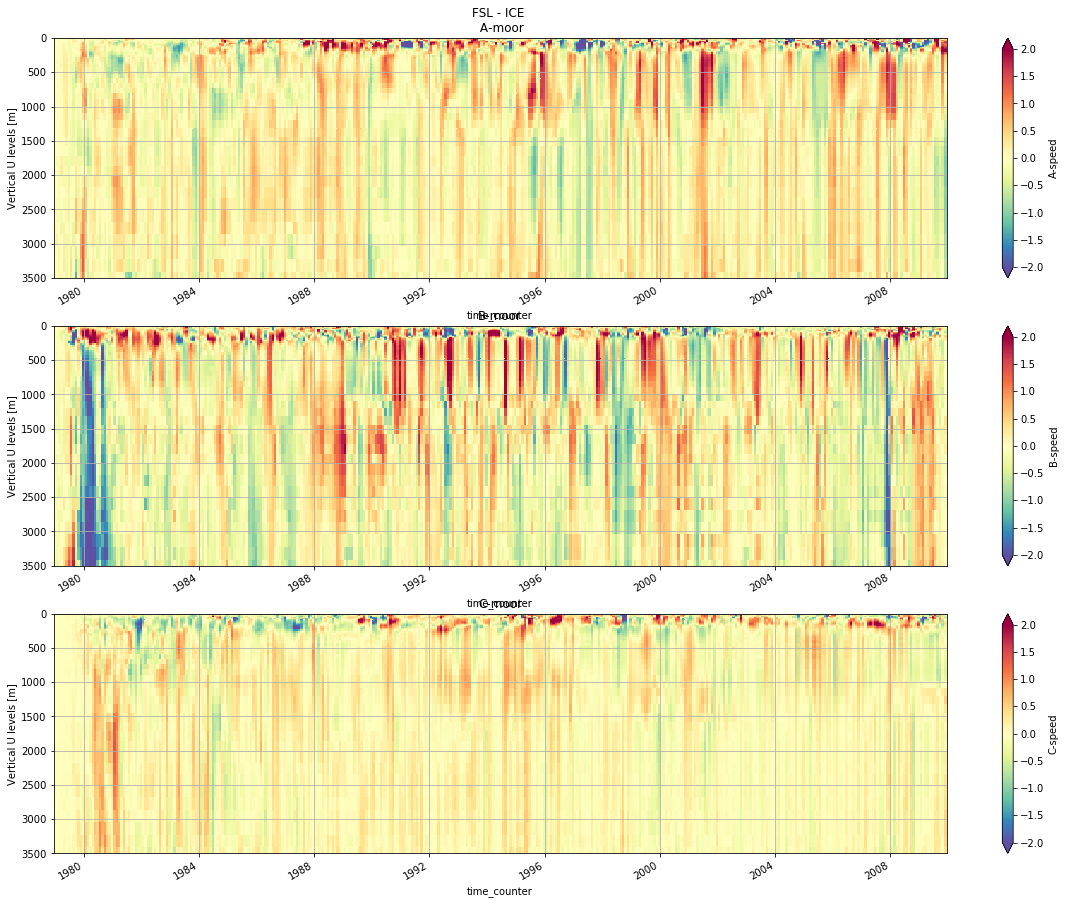

In [36]:
plt.figure(figsize=(20,15))

plt.subplot(311)
val_lim=2. # Moor-A
spd_name='A-speed'
((ds_exp[spd_name]-ds_ref[spd_name])*100.).plot(label='log',cmap='Spectral_r',vmin=-1.*val_lim,vmax=val_lim,extend='both',x='time_counter')
plt.ylim([0,3500.])
plt.gca().invert_yaxis()
plt.grid(True)
plt.title(CASEX+' - '+CASER+' \n A-moor')

plt.subplot(312)
val_lim=2. # Moor-B
spd_name='B-speed'
((ds_exp[spd_name]-ds_ref[spd_name])*100.).plot(label='log',cmap='Spectral_r',vmin=-1.*val_lim,vmax=val_lim,extend='both',x='time_counter')
plt.ylim([0,3500.])
plt.gca().invert_yaxis()
plt.grid(True)
plt.title('B-moor')

plt.subplot(313)
val_lim=2. # Moor-C
spd_name='C-speed'
((ds_exp[spd_name]-ds_ref[spd_name])*100.).plot(label='log',cmap='Spectral_r',vmin=-1.*val_lim,vmax=val_lim,extend='both',x='time_counter')
plt.ylim([0,3500.])
plt.gca().invert_yaxis()
plt.grid(True)
plt.title('C-moor')

if False:
    plt.savefig('./FIGURES/UV_PROFILES/CREG025.L74-NEMO420'+CASEX+'-'+CASER+'_BGOS_SpeedTiSe_profiles_y1979-2009.png',dpi=300)